# Notebook Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Math


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

from moments_toolkit import ratio_formula, sum_ratios_formula

import gvar as gv

#from utilities import plateau_search_symm

import itertools as it

import correlatoranalyser as CA

from moments_toolkit import average_moments_over_T
from utilities import jackknife_resamples, bootstrap_resamples

from moments_result import moments_result, moment_final_result, systematic_final_result, dict_from_results_list

In [2]:
coarse = True

In [3]:
if coarse:
    p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"
    p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/2PointCorrelation/"


    opAnalyzer1 = moments_toolkit(p3fold, p2fold,
                                skip3p=False, skipop=False,
                                verbose=True,
                                fast_data_folder = "../fast_data_extended_p0_q0",
                                operator_folder= "../operator_database",
                                momentum='PX0_PY0_PZ0',
                                insertion_momentum = 'qx0_qy0_qz0',
                                tag_2p='hspectrum',
                                max_n=2 #max_n=3
                                )


    opAnalyzer2 = moments_toolkit(p3fold, p2fold,
                                skip3p=False, skipop=False,
                                verbose=True,
                                fast_data_folder = "../fast_data_extended_px-2_q0",
                                operator_folder= "../operator_database",
                                momentum='PX-2_PY0_PZ0',
                                insertion_momentum = 'qx0_qy0_qz0',
                                tag_2p='hspectrum',
                                max_n=2 #max_n=3
                                )

    

else:

    #paths for the fine lattice
    p3fold = os.environ['mount_point_path'] + "64c64/3pt_binned_h5/"
    p2fold = os.environ['mount_point_path'] + "64c64/2pt_binned_h5/"

    # fine lattice - P = 0
    opAnalyzer1 = moments_toolkit(p3fold, p2fold,
                                skip3p=False, skipop=False,
                                verbose=True,
                                fast_data_folder = "../fast_data_extended_fine_p0_q0",
                                operator_folder= "../operator_database",
                                momentum='PX0_PY0_PZ0',
                                insertion_momentum = 'qx0_qy0_qz0',
                                tag_2p='hspectrum',
                                max_n=2 #max_n=3
                                )

    # fine lattice - Px = -1
    opAnalyzer2 = moments_toolkit(p3fold, p2fold,
                                skip3p=False, skipop=False,
                                verbose=True,
                                fast_data_folder = "../fast_data_extended_fine_px-1_q0",
                                operator_folder= "../operator_database",
                                momentum='PX-1_PY0_PZ0',
                                insertion_momentum = 'qx0_qy0_qz0',
                                tag_2p='hspectrum',
                                max_n=2 #max_n=3
                            )



Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



In [4]:
for opAnalyzer in [opAnalyzer1,opAnalyzer2]:
    opAnalyzer.set_resampling_type('jackknife')
    #opAnalyzer.set_resampling_type('bootstrap')
    opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=True, resample_fit_correlated=True)
    #opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=False, resample_fit_correlated=False)
    #opAnalyzer.remove_T(12)

    # #we take the operators of the paper


    opAnalyzer.focus_paper_operators(verbose=True)




    opAnalyzer.remove_zeroK_operators(verbose=True)


    Klist = opAnalyzer.get_Klist()


    opAnalyzer.display_operators()


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assuming a non zero kinematical factor for each operator.


From now on the result will be shown in terms of moments.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assuming a non zero kinematical factor for each operator.


From now on the result will be shown in terms of moments.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
opAnalyzer1.get_Klist()

[0.284385(96), 0.40218(14), -0.40218(14), 0.56877(19), 1.13754(38)]

In [6]:
opAnalyzer1

Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [0 0 0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 5
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10, 12]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife
Number of resamples: 212

Results given in terms of moments

In [7]:
#first we perform the fit with the main method
fit2p = opAnalyzer1.fit_2pcorr(show=False, save=False, fit_doubt_factor=3)

#then we grep the parameters from the models average
results = fit2p.model_average()

#we update the value of the resamples of the ground state energy stored in the class
#opAnalyzer1.E0_resamples = results["res"]["E0"]

In [8]:
results

{'est': {'A0': np.float64(6.52625879010459e-12),
  'E0': np.float64(0.5687709297855977),
  'dE1': np.float64(0.08226219511333788),
  'A1': np.float64(-1.795197461998286e-12)},
 'err': {'A0': np.float64(8.039430826263653e-15),
  'E0': np.float64(0.00019164525162114482),
  'dE1': np.float64(3.546513808523395e-08),
  'A1': np.float64(6.511426210469765e-16)},
 'res': {'A0': array([6.51215541e-12, 6.52945744e-12, 6.52913187e-12, 6.53356229e-12,
         6.53615517e-12, 6.53580486e-12, 6.51722251e-12, 6.52420777e-12,
         6.53194353e-12, 6.52176859e-12, 6.51941349e-12, 6.53148524e-12,
         6.52153885e-12, 6.52300773e-12, 6.51724981e-12, 6.53537800e-12,
         6.51615802e-12, 6.52536815e-12, 6.53163334e-12, 6.53592262e-12,
         6.52830899e-12, 6.52335627e-12, 6.51632022e-12, 6.52809481e-12,
         6.52635696e-12, 6.52361819e-12, 6.52728277e-12, 6.53285089e-12,
         6.51559750e-12, 6.51552292e-12, 6.52815307e-12, 6.52078510e-12,
         6.52848487e-12, 6.52568583e-12, 6.53

In [9]:
opAnalyzer1
opAnalyzer2

Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [0 0 0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 5
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10, 12]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife
Number of resamples: 212

Results given in terms of moments

Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [-2  0  0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 9
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10, 12]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife
Number of resamples: 212

Results given in terms of moments

In [10]:
result1 = opAnalyzer1.extract_result(verbose=True)
result1


Doing all the computations needed to have all the results obtainable from this class instance:


Performing the two-point correlator fit to compute E, m, and the kinematic factors, ...


Performing the two-point correlator fit to compute dE, ...


Computing matrix elements and moments from the summed ratios ...


Computing matrix elements and moments from the 2 state fit of the ratios ...


All computations done, putting all the results into one list ...


Results prepared and successfully returned!



[moments_result(value=0.18634(52), renormalized_value=0.1819(43), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48),
 moments_result(value=0.18496(59), renormalized_value=0.1806(43), operator=707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48),
 moments_result(value=0.1996(15), renormalized_value=0.1987(65), operator=707106781186547*O[3, 4]/1000000000000000 + 707106781186547*O[4, 3]/1000000000000000, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.995(31), X='A', a=0.11630(40), latticeT=48),
 moments_result(value=0.22104(54), renormalized_value=0.2200(53), operator=O[1, 2, 4] - O[2, 4, 1], P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.995(24), X='T', a=0.11630(40), latticeT=48),
 moments_result(value=0.21870(48), renormalized_value=0.2176(53), operator=O[1, 4, 2] - 2*O

In [11]:
len(result1)
result1[0].renormalized_value

25

0.1819(43)

In [12]:
result2 = opAnalyzer2.extract_result(verbose=True)
result2

len(result2)
result2[0].renormalized_value


Doing all the computations needed to have all the results obtainable from this class instance:


Performing the two-point correlator fit to compute E, m, and the kinematic factors, ...


Performing the two-point correlator fit to compute dE, ...


Computing matrix elements and moments from the summed ratios ...


Computing matrix elements and moments from the 2 state fit of the ratios ...


All computations done, putting all the results into one list ...


Results prepared and successfully returned!



[moments_result(value=0.1596(12), renormalized_value=0.1559(38), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48),
 moments_result(value=0.1564(19), renormalized_value=0.1527(40), operator=707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48),
 moments_result(value=0.21480(39), renormalized_value=0.2146(52), operator=707106781186547*O[1, 4]/1000000000000000 + 707106781186547*O[4, 1]/1000000000000000, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.999(24), X='V', a=0.11630(40), latticeT=48),
 moments_result(value=0.22944(76), renormalized_value=0.2284(73), operator=707106781186547*O[1, 3]/1000000000000000 + 707106781186547*O[3, 1]/1000000000000000, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.995(31), X='A', a=0.11630(40), latticeT=48),
 mom

48

0.1559(38)

In [13]:
from moments_result import dict_from_results_list, moments_weights_from_dict, moment_final_result, systematic_final_result

In [14]:
res_dict1 = dict_from_results_list(result1)
res_dict1

{('V',
  48): [moments_result(value=0.18634(52), renormalized_value=0.1819(43), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.18496(59), renormalized_value=0.1806(43), operator=707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.2220(39), renormalized_value=0.2167(63), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=1, T=6, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.2142(62), renormalized_value=0.2091(78), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=1, T=7, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.207(11), renormalized_value=0.202(12), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/

In [15]:
res_dict2 = dict_from_results_list(result2)
res_dict2

{('V',
  48): [moments_result(value=0.1596(12), renormalized_value=0.1559(38), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.1564(19), renormalized_value=0.1527(40), operator=707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.21480(39), renormalized_value=0.2146(52), operator=707106781186547*O[1, 4]/1000000000000000 + 707106781186547*O[4, 1]/1000000000000000, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=2, T=None, Z=0.999(24), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.2142(52), renormalized_value=0.2091(71), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(-0.261799(0), 0 ± 0, 0 ± 0), method=1, T=6, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.1984(76), re

In [16]:
res_dict = dict_from_results_list(result1+result2)
res_dict

{('V',
  48): [moments_result(value=0.18634(52), renormalized_value=0.1819(43), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.18496(59), renormalized_value=0.1806(43), operator=707106781186547*O[3, 3]/1000000000000000 - 707106781186547*O[4, 4]/1000000000000000, P=(0 ± 0, 0 ± 0, 0 ± 0), method=2, T=None, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.2220(39), renormalized_value=0.2167(63), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=1, T=6, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.2142(62), renormalized_value=0.2091(78), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2, P=(0 ± 0, 0 ± 0, 0 ± 0), method=1, T=7, Z=0.976(23), X='V', a=0.11630(40), latticeT=48), moments_result(value=0.207(11), renormalized_value=0.202(12), operator=O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/

In [17]:
moment_final_result(res_dict1)
systematic_final_result(res_dict1)

{('V', 48): 0.1907(78), ('A', 48): 0.229(21), ('T', 48): 0.245(11)}

{('V', 48): np.float64(0.01216788549638801),
 ('A', 48): np.float64(0.032956963828716344),
 ('T', 48): np.float64(0.029706165563735117)}

In [18]:
moment_final_result(res_dict2)
systematic_final_result(res_dict2)

{('V', 48): 0.175(12), ('A', 48): 0.237(23), ('T', 48): 0.217(16)}

{('V', 48): np.float64(0.03294106690531928),
 ('A', 48): np.float64(0.04980171189249552),
 ('T', 48): np.float64(0.05939414266480923)}

In [19]:
moment_final_result(res_dict)
systematic_final_result(res_dict)

{('V', 48): 0.1800(92), ('A', 48): 0.234(19), ('T', 48): 0.221(13)}

{('V', 48): np.float64(0.0285550362266163),
 ('A', 48): np.float64(0.04707027949159791),
 ('T', 48): np.float64(0.05506604442941004)}

In [20]:
#opAnalyzer1.set_resampling_type("bootstrap")#,Nres=500)
opAnalyzer1.get_M_from_S(method="finite differences", scheme='central', renormalize=False)
opAnalyzer1.get_M_from_S(method="finite differences", scheme='central', renormalize=False)
opAnalyzer1.get_M_from_S(method="finite differences", scheme='central', renormalize=True)

array([[0 ± 0, 0 ± 0, 0.2382(25), 0.2220(39), 0.2142(62), 0.207(11),
        0.213(31), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2385(27), 0.2221(41), 0.2107(66), 0.198(12),
        0.190(35), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2670(28), 0.2437(42), 0.2311(61), 0.229(11),
        0.274(61), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2844(32), 0.2601(47), 0.2512(72), 0.244(13),
        0.276(45), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2820(29), 0.2588(38), 0.2502(59), 0.243(11),
        0.299(41), 0 ± 0]], dtype=object)

array([[0 ± 0, 0 ± 0, 0.2382(25), 0.2220(39), 0.2142(62), 0.207(11),
        0.213(31), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2385(27), 0.2221(41), 0.2107(66), 0.198(12),
        0.190(35), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2670(28), 0.2437(42), 0.2311(61), 0.229(11),
        0.274(61), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2844(32), 0.2601(47), 0.2512(72), 0.244(13),
        0.276(45), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2820(29), 0.2588(38), 0.2502(59), 0.243(11),
        0.299(41), 0 ± 0]], dtype=object)

array([[0 ± 0, 0 ± 0, 0.2326(59), 0.2167(63), 0.2091(78), 0.202(12),
        0.208(31), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2329(60), 0.2169(65), 0.2057(80), 0.193(12),
        0.186(34), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2658(89), 0.2426(87), 0.2301(95), 0.228(13),
        0.272(61), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2831(75), 0.2588(78), 0.2500(94), 0.243(14),
        0.275(46), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2806(73), 0.2575(72), 0.2490(84), 0.242(12),
        0.297(42), 0 ± 0]], dtype=object)

In [21]:
reslist = [result1,result2]
ok = []
for res in reslist:
    ok+=res
#ok

ok_dict = dict_from_results_list(ok)
moment_final_result(ok_dict)
systematic_final_result(ok_dict)

{('V', 48): 0.1800(92), ('A', 48): 0.234(19), ('T', 48): 0.221(13)}

{('V', 48): np.float64(0.0285550362266163),
 ('A', 48): np.float64(0.04707027949159791),
 ('T', 48): np.float64(0.05506604442941004)}

In [22]:
res_with_sys = gv.gvar(float(str(moment_final_result(ok_dict)[('V', 48)]).split('(')[0]) , systematic_final_result(ok_dict)[('V', 48)] )
res_with_sys

res_with_sys = str(res_with_sys)

res_with_stat = moment_final_result(ok_dict)[('V', 48)]
res_with_stat

res_with_stat = str(res_with_stat)

digit_difference = - len(res_with_sys.split('(')[0]) + len(res_with_stat.split('(')[0])

if digit_difference < 0:

    value = res_with_stat.split('(')[0]
    sig_stat = '(' + res_with_stat.split('(')[1]

    if digit_difference == -1:
        sig_sys = '(0' + res_with_sys.split('(')[1][0] + ')'
    else:
        sig_sys = '(00)'

elif digit_difference > 0:

    value = res_with_sys.split('(')[0]
    sig_sys = '(' + res_with_sys.split('(')[1]

    if digit_difference == 1:
        sig_stat = '(0' + res_with_stat.split('(')[1][0] + ')'
    else:
        sig_stat = '(00)'

else:
    value = res_with_stat.split('(')[0]
    sig_stat = '(' + res_with_stat.split('(')[1]
    sig_sys = '(' + res_with_sys.split('(')[1]
    

value+sig_stat+sig_sys

0.180(29)

0.1800(92)

'0.180(09)(29)'

In [25]:
#function used to check the results obtained from a list of datasets against their reference values
def check_results(datasets_list:list[moments_toolkit], reference_moments:dict[gv._gvarcore.GVar], reference_systematics:dict[float]):
    """
    Function used to check the results (moments with their uncertainties) against the related reference values
    
    Input:
        - datasets_list: list of moments_toolkit class instances from which the results can be extracted
        - reference_moments: dictionary of gvar variables containing the reference values of the moments,
                             the structure of the dict is key:value = (dirac structure, latticeT):moment value
        - reference_systematics: dictionary containing the values of the systematic uncertainties,
                                 the structure of the dict is key:value = (dirac structure, latticeT):uncertainty
    
    Output:
        -                        
    """

    #we extract the result from each moments toolkit class instance and we put them in a list
    result_list = [dataset_analizer.extract_result(verbose=False) for dataset_analizer in datasets_list]

    #we collapse the list of lists with results into one single list containing all the results
    total_result_list = []
    for result in result_list:
        total_result_list += result

    #we translate the list with all the results into an equivalent dictionary (keys being (dirac structure, latticeT) )
    total_result_dict = dict_from_results_list(total_result_list)

    #from the above dictionary we obtain two dictionaries with the same keys, containing respectively moments and systematics
    result_moments = moment_final_result(total_result_dict)
    result_systematic = systematic_final_result(total_result_dict)

    print("\nResult Summary\n")
    
    #we now loop over all the keys and for each we do a comparison
    for key in total_result_dict.keys():

        print(f"\n{key}\n")

        # #we do a litle bit of string manipulation

        # result_with_systematic = str( gv.gvar(float(str(result_moments[key]).split('(')[0]) , result_systematic[key] ) )
        


        # result_with_statistical = str(result_moments[key])


        # digit_difference = - len(result_with_systematic.split('(')[0]) + len(result_with_statistical.split('(')[0])

        # if digit_difference < 0:

        #     value = result_with_statistical.split('(')[0]
        #     sig_stat = '(' + result_with_statistical.split('(')[1]

        #     if digit_difference == -1:
        #         sig_sys = '(0' + result_with_systematic.split('(')[1][0] + ')'
        #     else:
        #         sig_sys = '(00)'

        # elif digit_difference > 0:

        #     value = result_with_systematic.split('(')[0]
        #     sig_sys = '(' + result_with_systematic.split('(')[1]

        #     if digit_difference == 1:
        #         sig_stat = '(0' + result_with_statistical.split('(')[1][0] + ')'
        #     else:
        #         sig_stat = '(00)'

        # else:
        #     value = result_with_statistical.split('(')[0]
        #     sig_stat = '(' + result_with_statistical.split('(')[1]
        #     sig_sys = '(' + result_with_systematic.split('(')[1]
            

        # print(f"\t - {value+sig_stat+sig_sys}\n")

        print(f"\t- result: {result_to_str(result_moments[key],result_systematic[key])}\n")
        print(f"\t- reference: {result_to_str(datasets_list[0].reference_moments_dict[key], datasets_list[0].reference_systematics_dict[key])}\n")
        print(f"\t- difference: {result_to_str(result_moments[key]-datasets_list[0].reference_moments_dict[key], np.sqrt(result_systematic[key]**2+datasets_list[0].reference_systematics_dict[key]**2) )}\n")
        


def result_to_str(moment_gvar, moment_sys) -> str:

    result_with_systematic = str( gv.gvar(float(str(moment_gvar).split('(')[0]) ,moment_sys ) )
        


    result_with_statistical = str(moment_gvar)


    digit_difference = - len(result_with_systematic.split('(')[0]) + len(result_with_statistical.split('(')[0])

    if digit_difference < 0:

        value = result_with_statistical.split('(')[0]
        sig_stat = '(' + result_with_statistical.split('(')[1]

        if digit_difference == -1:
            sig_sys = '(0' + result_with_systematic.split('(')[1][0] + ')'
        else:
            sig_sys = '(00)'

    elif digit_difference > 0:

        value = result_with_systematic.split('(')[0]
        sig_sys = '(' + result_with_systematic.split('(')[1]

        if digit_difference == 1:
            sig_stat = '(0' + result_with_statistical.split('(')[1][0] + ')'
        else:
            sig_stat = '(00)'

    else:
        value = result_with_statistical.split('(')[0]
        sig_stat = '(' + result_with_statistical.split('(')[1]
        sig_sys = '(' + result_with_systematic.split('(')[1]

    return value+sig_stat+sig_sys



In [26]:
check_results([opAnalyzer1,opAnalyzer2],{},{})#,opAnalyzer1.reference_moments_dict,opAnalyzer1.reference_systematics_dict)


Result Summary


('V', 48)

	- result: 0.180(09)(29)

	- reference: 0.192(08)(20)

	- difference: -0.012(12)(35)


('A', 48)

	- result: 0.234(19)(47)

	- reference: 0.212(05)(21)

	- difference: 0.022(20)(52)


('T', 48)

	- result: 0.221(13)(55)

	- reference: 0.235(06)(25)

	- difference: -0.014(14)(60)



# Intermediate Results


Preparing the fit for the ratio of the correlators...


Looping over the operators, performing for each a series of fit: ...



100%|██████████| 5/5 [02:22<00:00, 28.47s/it]



Plotting the fit of the ratios for each operator ...



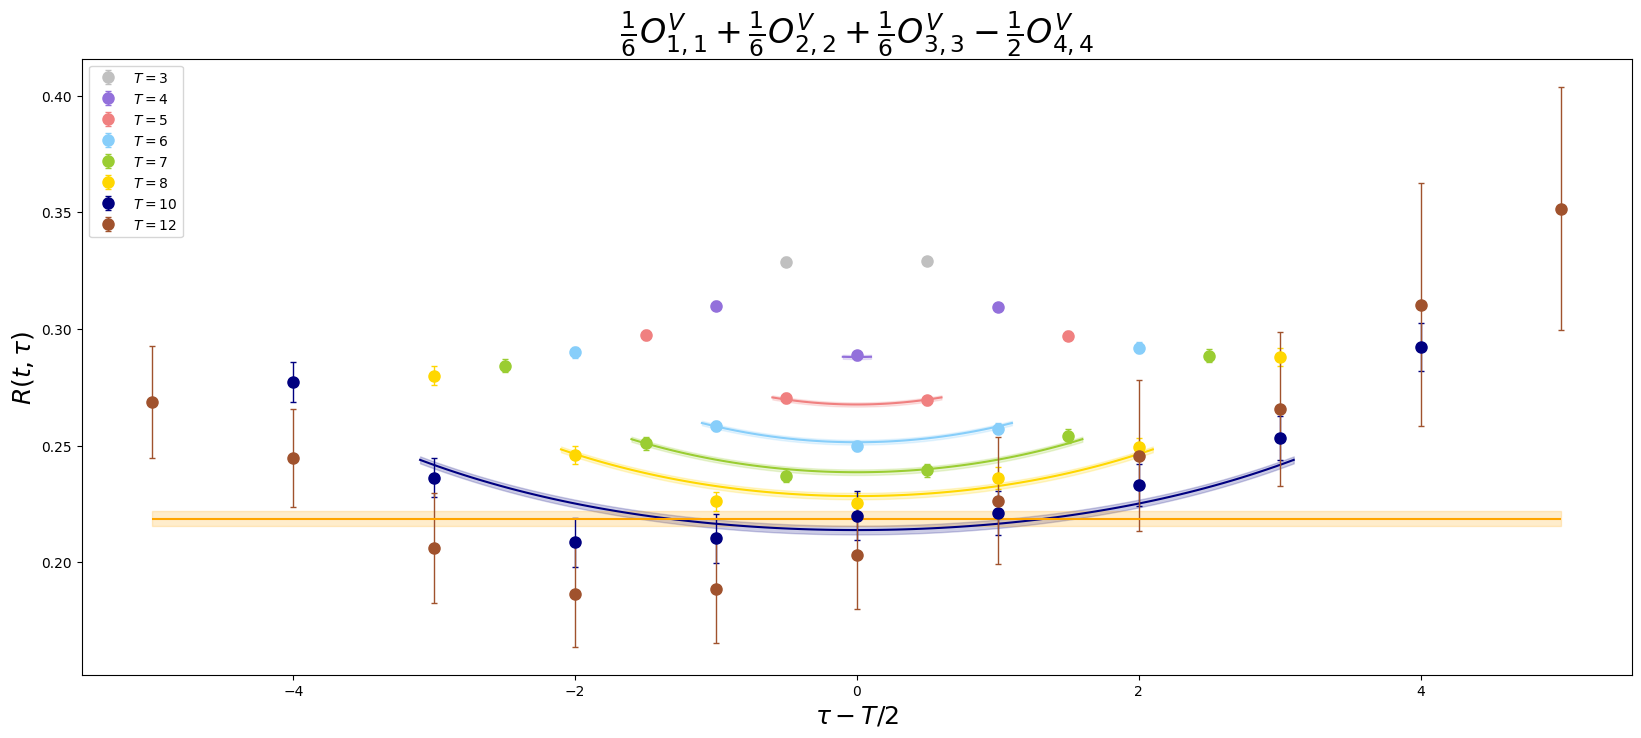

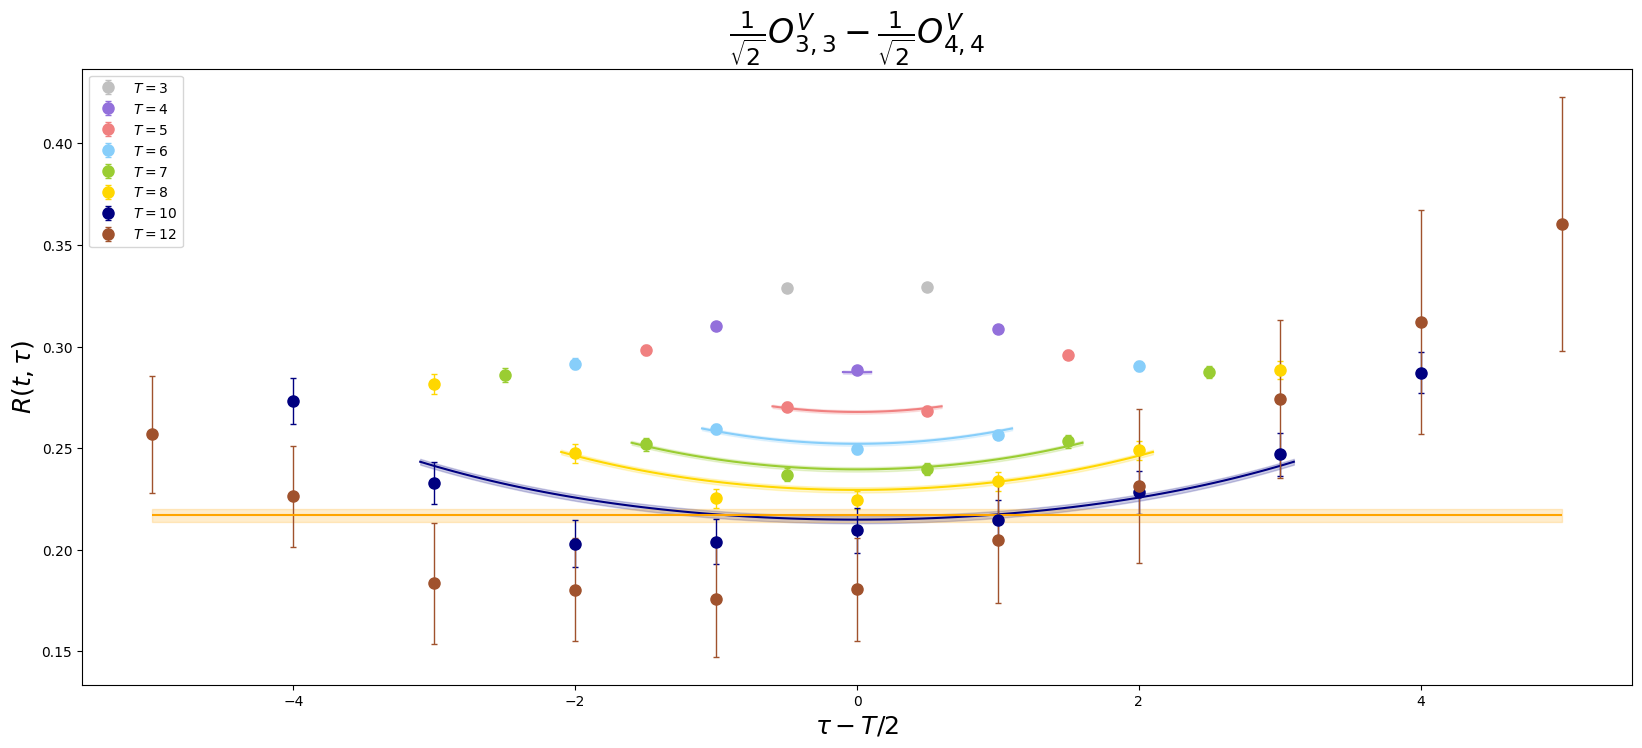

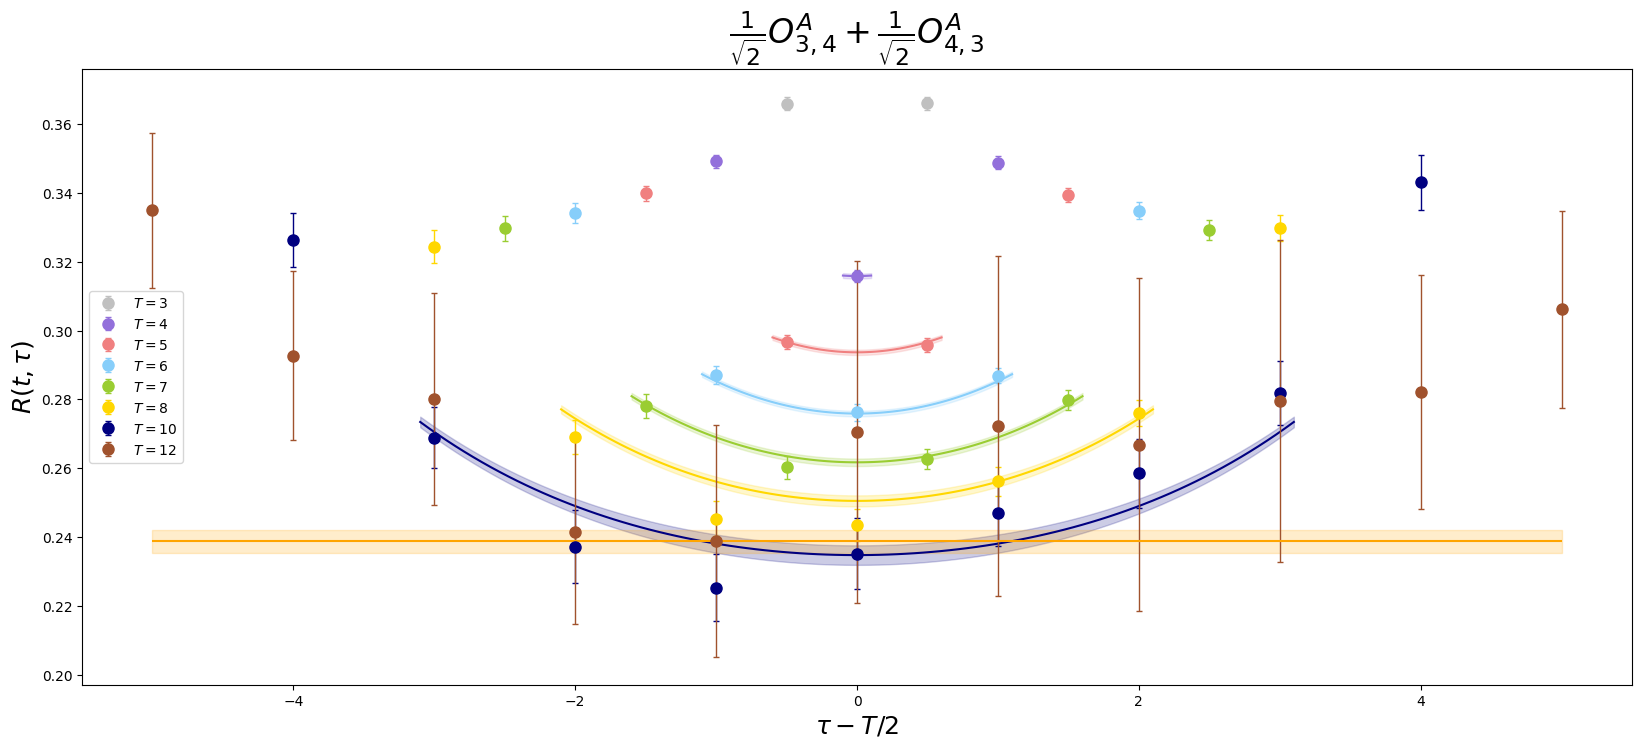

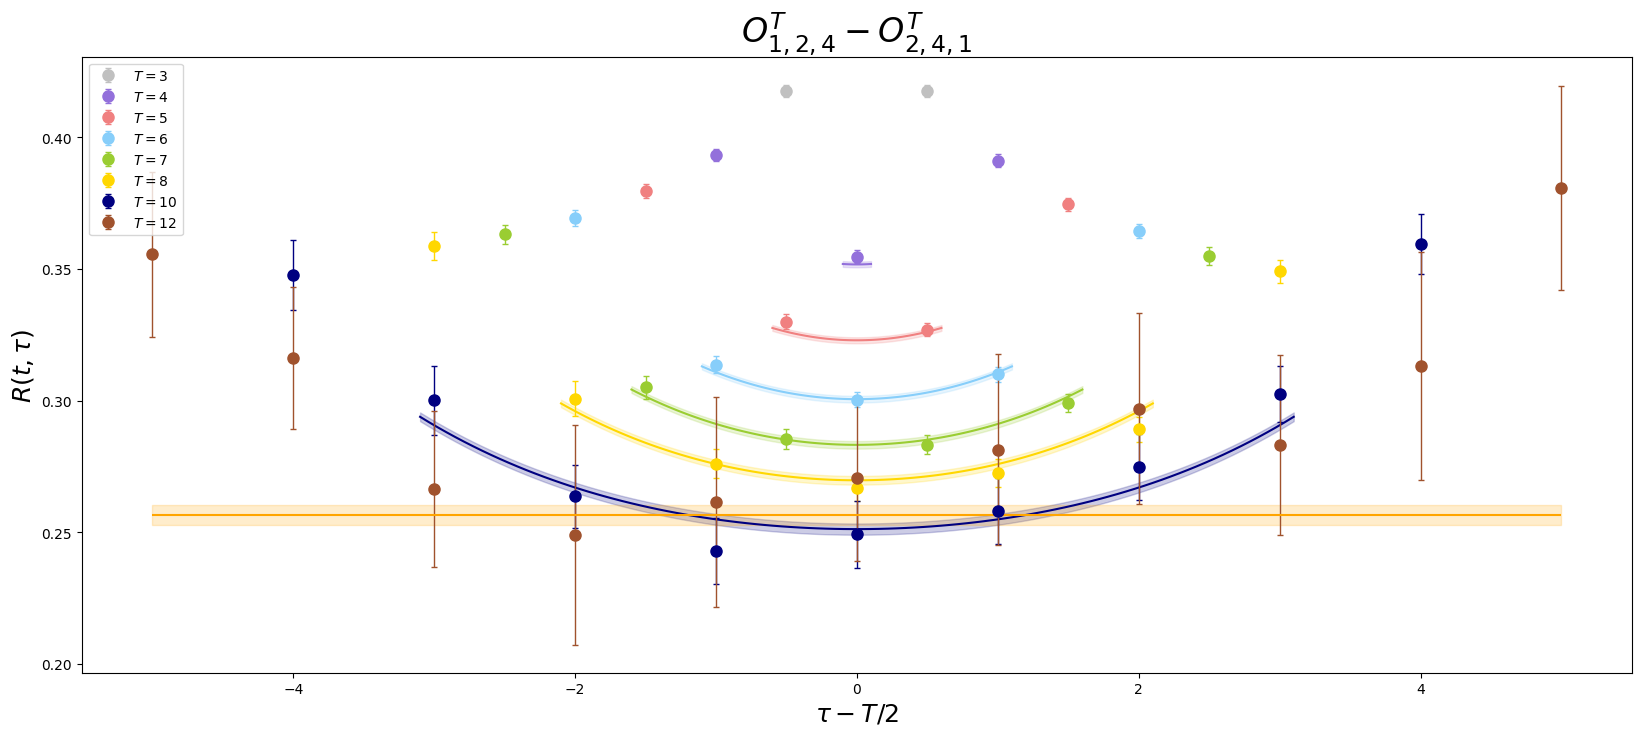

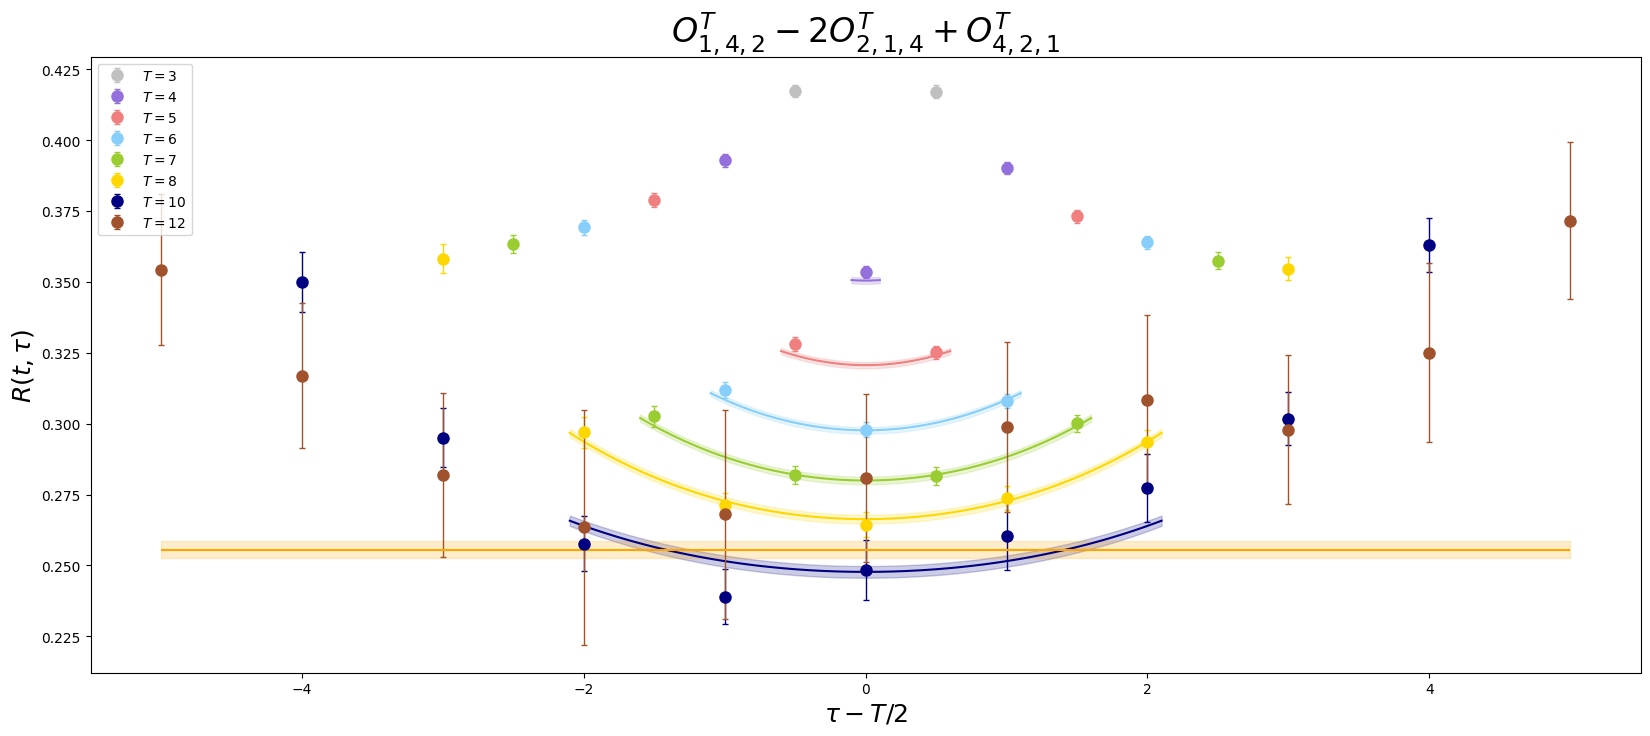


Fit routine succesfully completed!



In [21]:
fit_res1 = opAnalyzer1.fit_ratio(verbose=True, show=True,save=True, chi2_threshold=5.0, prior="flat")#prior="guess")


Preparing the fit for the ratio of the correlators...


Looping over the operators, performing for each a series of fit: ...



100%|██████████| 9/9 [04:50<00:00, 32.25s/it]



Plotting the fit of the ratios for each operator ...



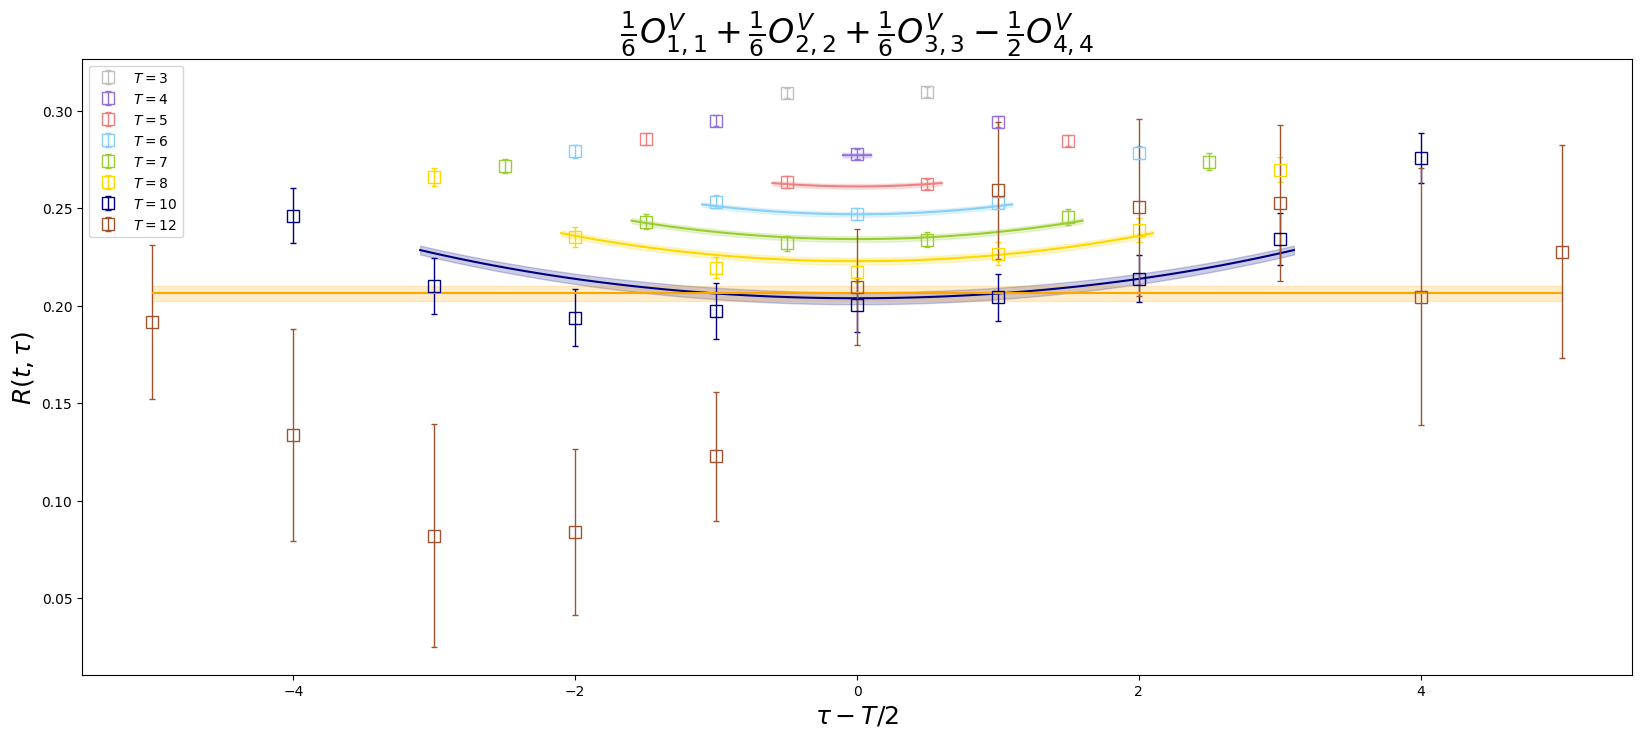

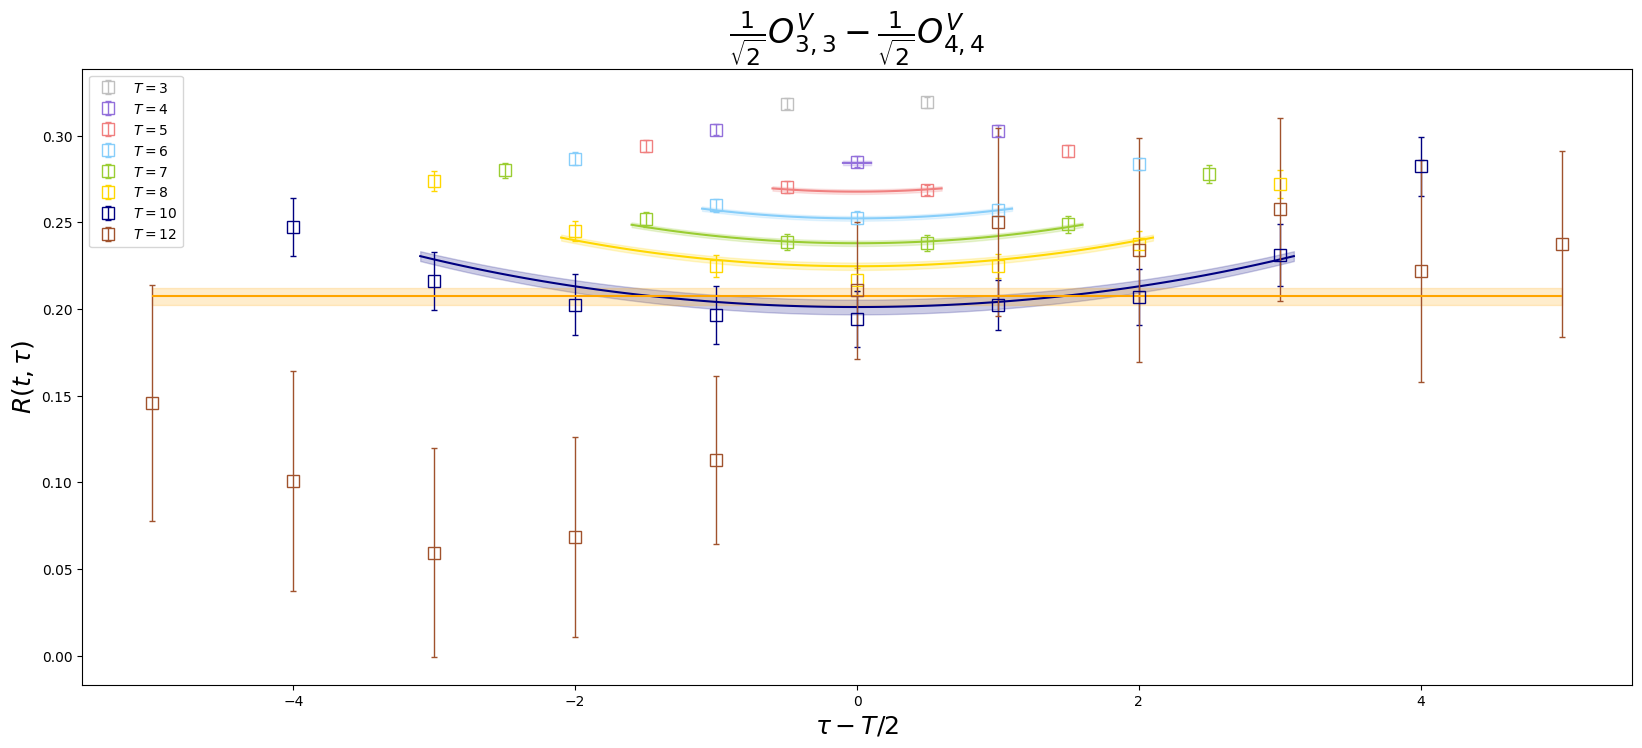

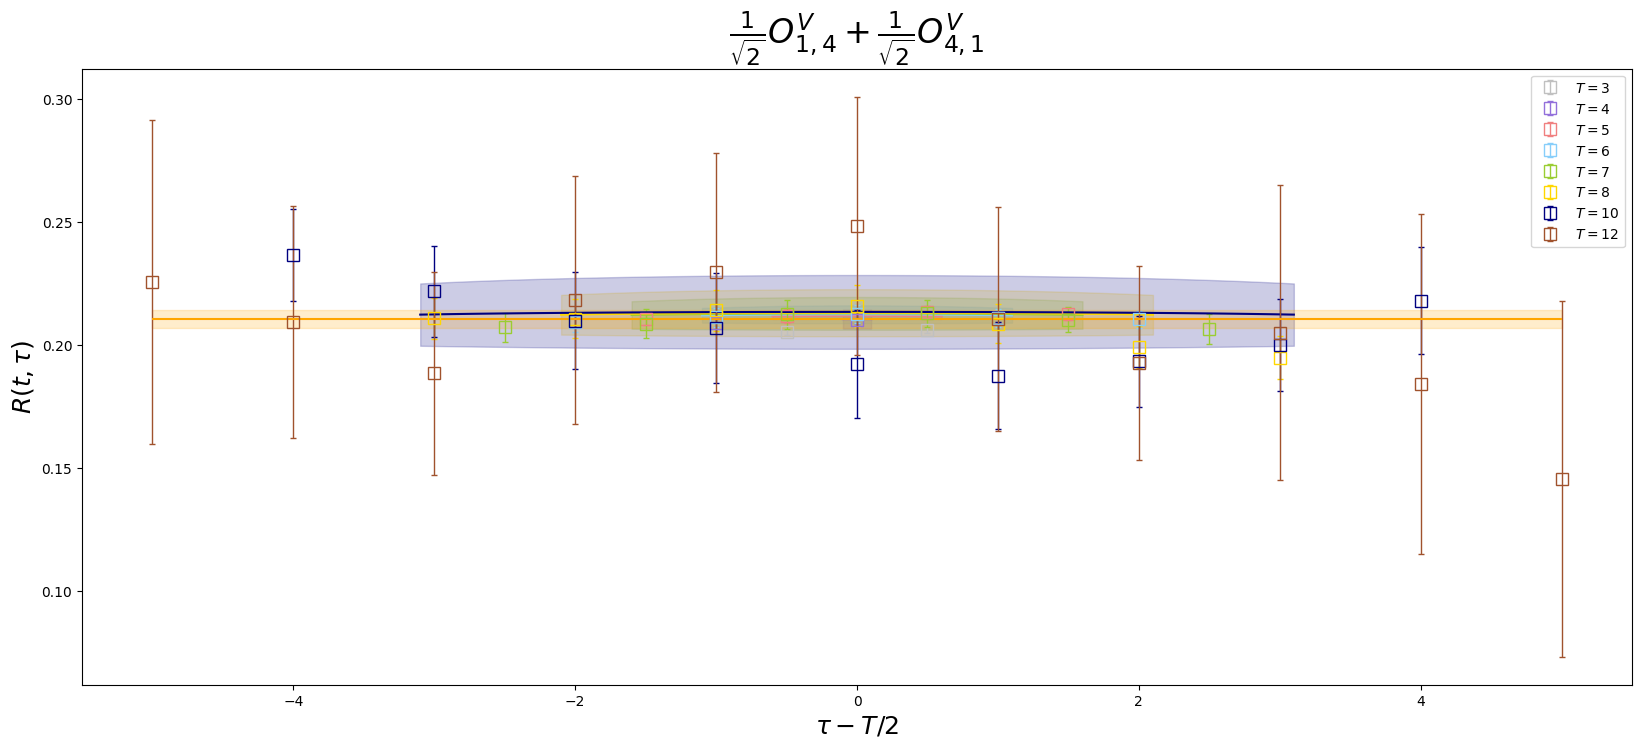

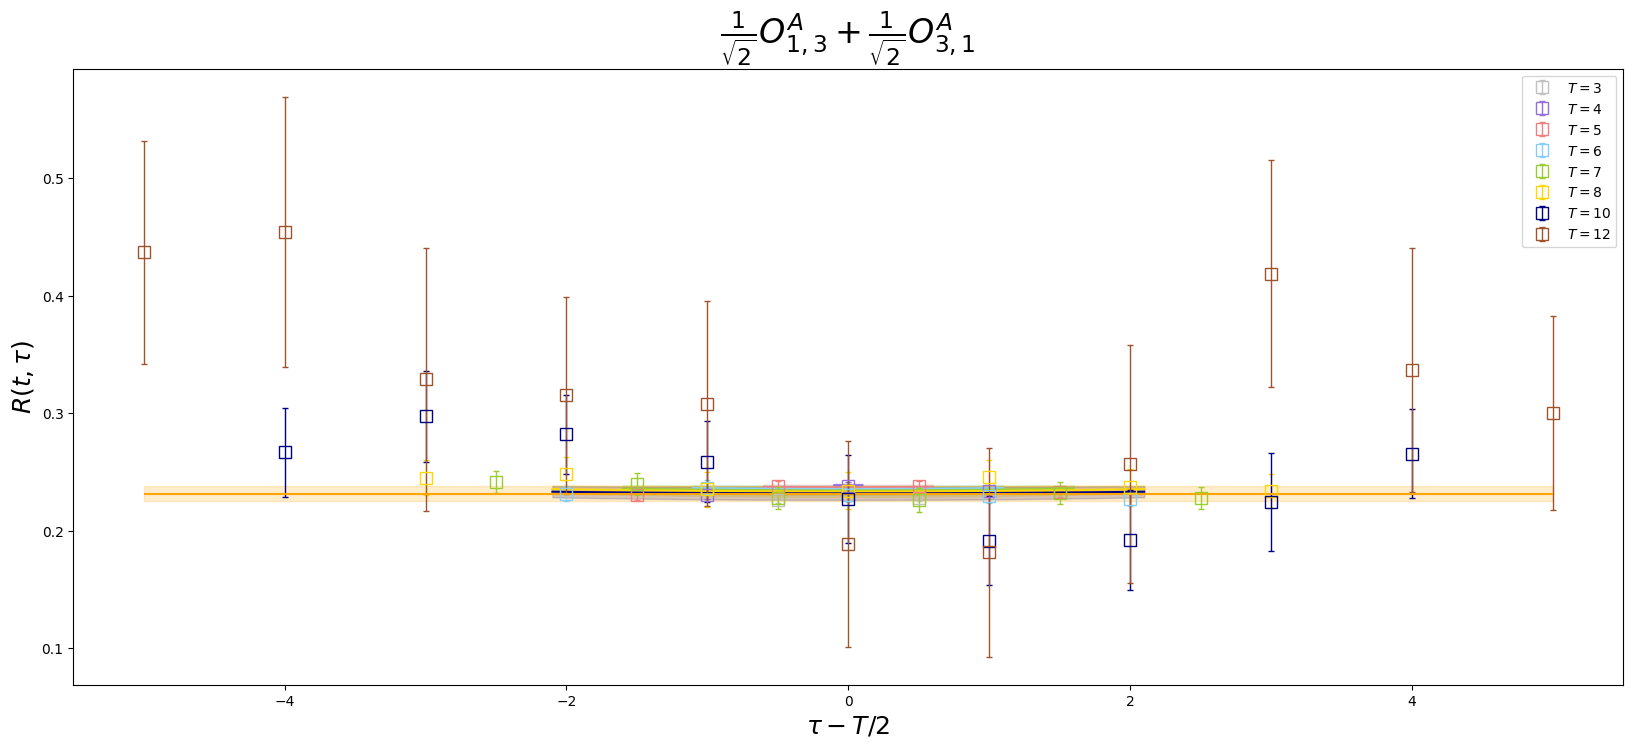

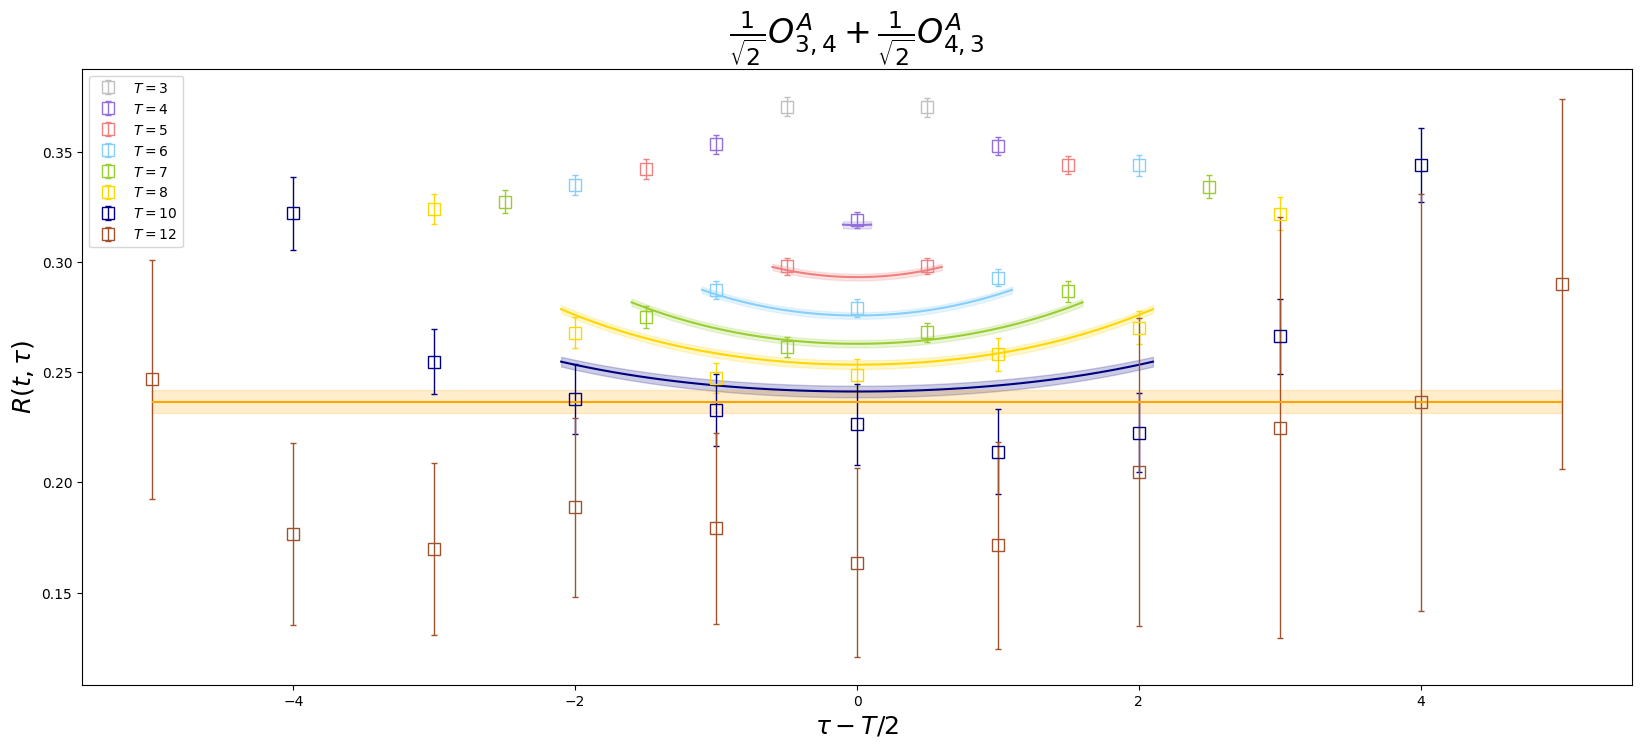

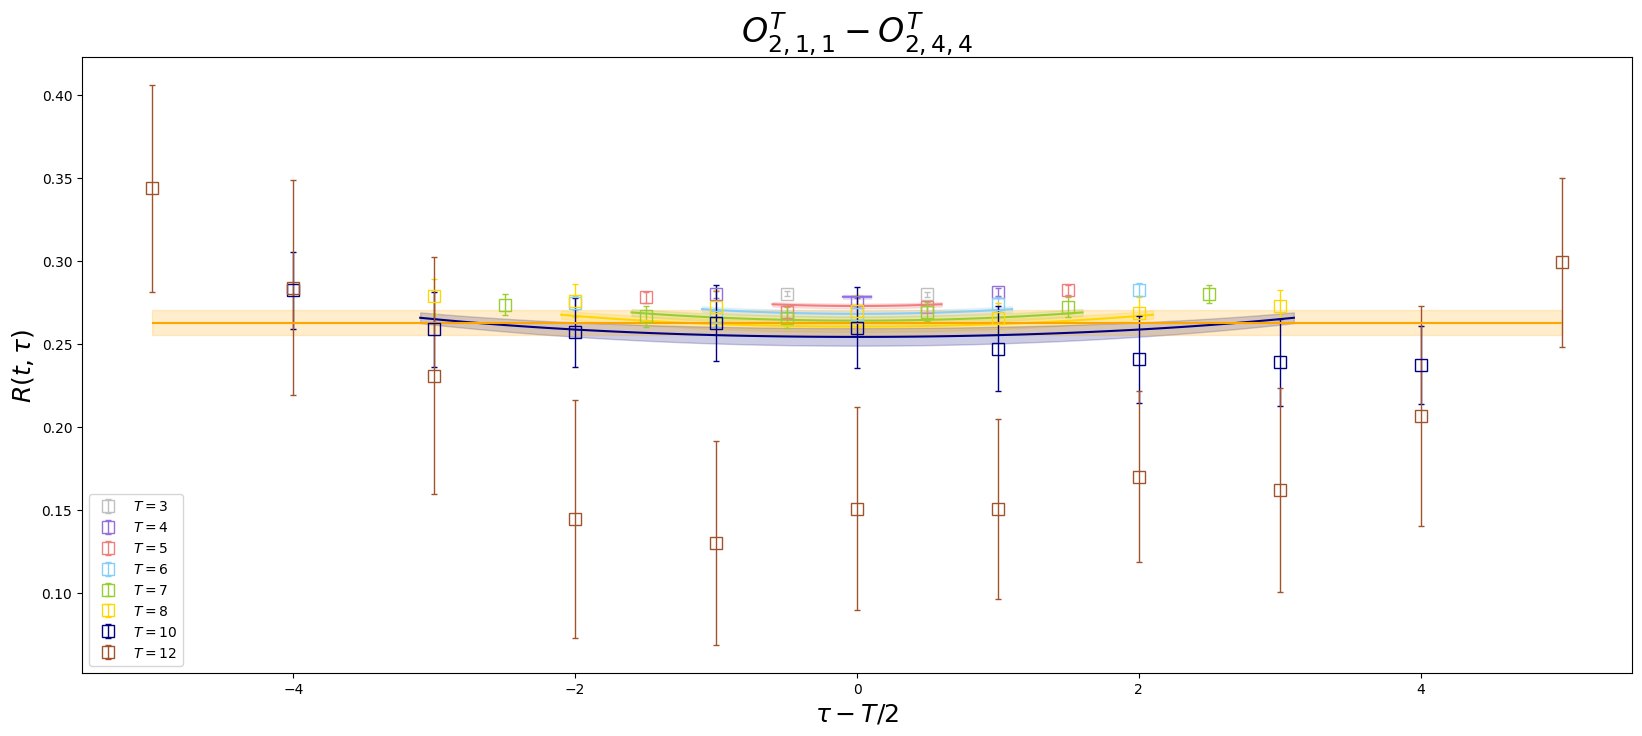

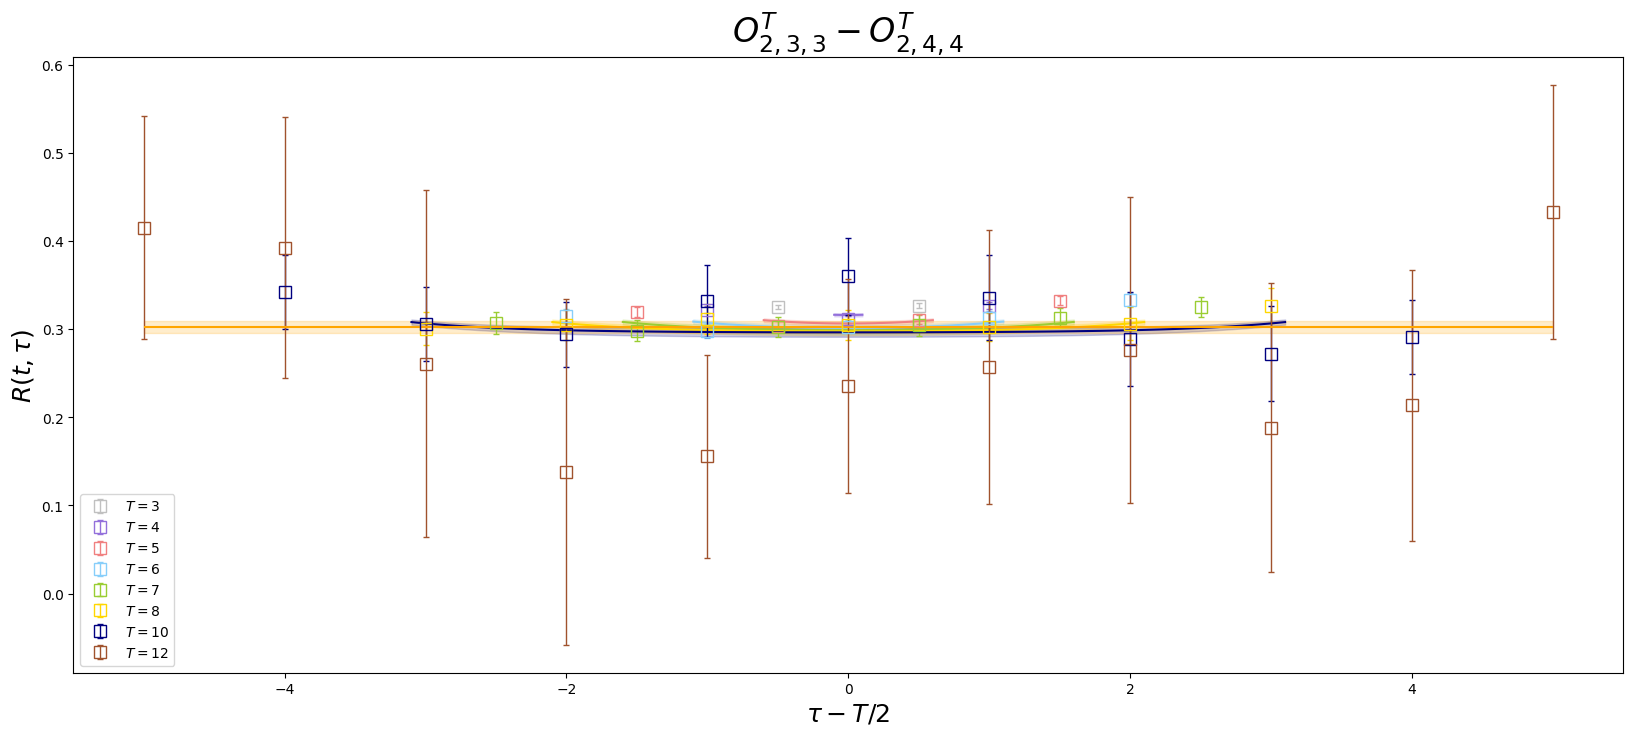

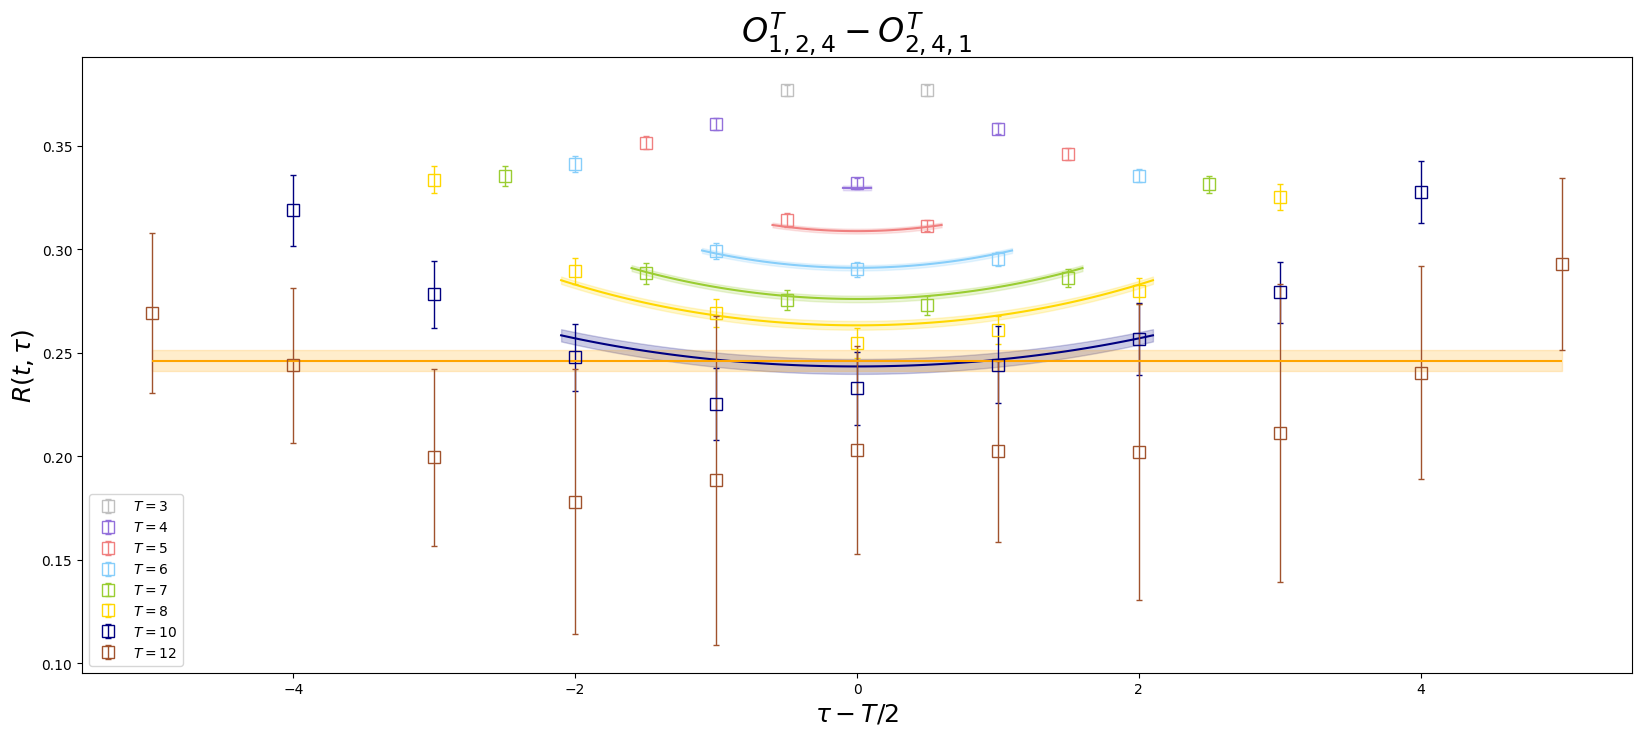

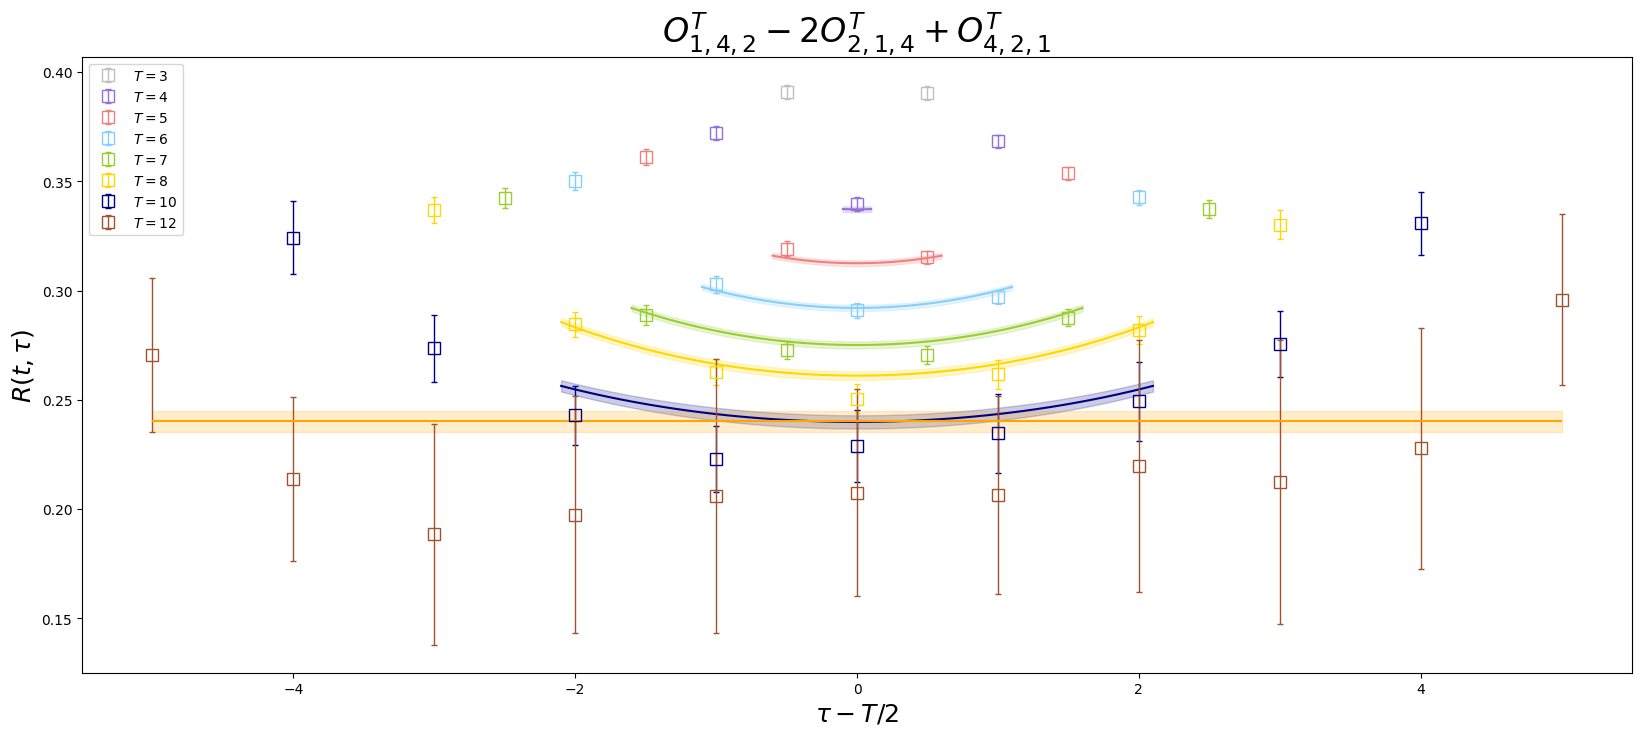


Fit routine succesfully completed!



In [22]:
fit_res2 = opAnalyzer2.fit_ratio(verbose=True, show=True,save=True,  chi2_threshold=1.0, prior="flat")#prior="guess")

In [23]:
fit_res1

[FitState(fit_results=[FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.824 [22]
   AIC = -18.5 
     - A00: 0.1893(61)  [1(100)]
     - dE1(0): 0.463(29)  [0.16(82)]
     - A01: 0.1245(39)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=20, resample:jkn]:
   𝜒²/dof [dof] = 0.781 [20]
   AIC = -16.9 
     - A00: 0.1899(67)  [1(100)]
     - dE1(0): 0.463(31)  [0.16(82)]
     - A01: 0.1237(39)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.823 [22]
   AIC = -15.5 
     - A00: 0.187(13)  [1(100)]
     - dE1(0): 0.456(52)  [0.16(82)]
     - A01: 0.126(11)  [1(100)]
     - A11: -0.006(32)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.823 [22]
   AIC = -15.5 
     - A00: 0.187(13)  [1(100)]
     - dE1(0): 0.456(52)  [0.16(82)]
     - A01: 0.126(11)  [1(100)]
     - A11: -0.006(32)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=20, resample:jkn]:
   𝜒²/dof [dof] = 0.774 [20]
   AIC = -13.9 
 

In [24]:
fit_res2

[FitState(fit_results=[FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.606 [22]
   AIC = -23.3 
     - A00: 0.165(11)  [1(100)]
     - dE1(0): 0.314(34)  [0.5(2.7)]
     - A01: 0.1047(59)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.51 [22]
   AIC = -22.4 
     - A00: 0.109(57)  [1(100)]
     - dE1(0): 0.234(60)  [0.5(2.7)]
     - A01: 0.157(52)  [1(100)]
     - A11: -0.072(61)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=22, resample:jkn]:
   𝜒²/dof [dof] = 0.51 [22]
   AIC = -22.4 
     - A00: 0.109(57)  [1(100)]
     - dE1(0): 0.234(60)  [0.5(2.7)]
     - A01: 0.157(52)  [1(100)]
     - A11: -0.072(61)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=20, resample:jkn]:
   𝜒²/dof [dof] = 0.666 [20]
   AIC = -19.2 
     - A00: 0.165(12)  [1(100)]
     - dE1(0): 0.316(38)  [0.5(2.7)]
     - A01: 0.1046(60)  [1(100)]
 , FitResult[ ([4 2],[10  8]), Ndata=20, resample:jkn]:
   𝜒²/dof [dof] = 0.555 [20]
   AIC = -18.2 
     

In [25]:
for iop,res in enumerate(fit_res1):
    opAnalyzer2.selected_op[iop].display()
    result = res.model_average()
    mat = gv.gvar( result["est"]["A00"], result["err"]["A00"] )
    #Klist = opAnalyzer1.get_Klist()
    #mat / Klist[iop]
    [fit.chi2/fit.dof for fit in res]

<IPython.core.display.Math object>

[0.8244362746858805,
 0.7806476623208696,
 0.8230320845917184,
 0.8230320845917184,
 0.7739593733684789,
 0.8520103109842943,
 0.8861245136551493,
 0.8283764633235102]

<IPython.core.display.Math object>

[1.0910471753190527,
 1.0315132815359755,
 1.014957681393205,
 1.0872042662793644,
 1.0872042662793644,
 1.0299139246915026,
 1.0742542658098828,
 0.9974000304251711]

<IPython.core.display.Math object>

[1.2287863725659565,
 1.2287863725659565,
 1.2294441414728243,
 1.473775112320176,
 1.0065929004385588,
 1.1073973776161268,
 1.399954923113851,
 1.5462376752227656,
 1.3147034199068708,
 1.346273222246618,
 1.490414810073813,
 1.7093384331128738]

<IPython.core.display.Math object>

[0.8822231982019857,
 0.840544161305052,
 0.8809943737191926,
 0.8809943737191926,
 0.8356864531868766,
 0.8928396780085652,
 0.916145241978711,
 0.8808273579099244]

<IPython.core.display.Math object>

[0.847365085671834,
 0.847594802581129,
 0.845530331291384,
 0.845530331291384,
 0.8404671730133944,
 0.9389607780681717,
 0.9281662246764026,
 1.0653934974644397,
 1.016347668548554,
 1.080170058620936,
 1.0507835312044624,
 1.0009885376904033]

In [26]:
for iop,res in enumerate(fit_res2):
    opAnalyzer2.selected_op[iop].display()
    result = res.model_average()
    mat = gv.gvar( result["est"]["A00"], result["err"]["A00"] )
    #Klist = opAnalyzer2.get_Klist()
    #mat / Klist[iop]
    [fit.chi2/fit.dof for fit in res]

<IPython.core.display.Math object>

[0.6057196069567032,
 0.5100637509256449,
 0.5100637509256449,
 0.6656654255245362,
 0.5552227882673006,
 0.7374166965840295,
 0.5909382722252055,
 0.757980818508498]

<IPython.core.display.Math object>

[0.7488879128468379,
 0.7488879128468379,
 0.9320235871635212,
 0.6850200203194915,
 0.9473467115844079,
 0.6891672475360058,
 1.0105593321805075,
 0.964559734057929]

<IPython.core.display.Math object>

[0.8147596069433198,
 0.7980218344825448,
 0.7768292679026806,
 0.7768292679026806]

<IPython.core.display.Math object>

[1.0245933477851252,
 1.0159853783428923,
 1.0159853783428923,
 1.0820530575669263,
 1.083308045057632,
 1.0752487564082387]

<IPython.core.display.Math object>

[1.1349870906351653,
 1.0405850661973486,
 1.1294756862462303,
 1.1294756862462303,
 1.022384134302568,
 1.1156381251123637,
 0.9772845216737471,
 0.9642880556387016,
 1.0637442800070327,
 1.0445192503270397,
 0.9753391280040538,
 0.9166943191458883]

<IPython.core.display.Math object>

[0.6202523942927999,
 0.5714182125963866,
 0.5714182125963866,
 0.6497880259589521]

<IPython.core.display.Math object>

[0.7579370056873802,
 0.7817748468913186,
 0.7457958979317701,
 0.7457958979317701]

<IPython.core.display.Math object>

[0.9669806735082203,
 0.8265785110712104,
 0.8265785110712104,
 1.0085141122784498,
 0.836295819836192,
 1.0460599528000192,
 0.8908244626386895,
 0.9302280626076537,
 1.1268110275806384,
 0.8682326736710351,
 0.8406554982174599,
 1.2063389905559618]

<IPython.core.display.Math object>

[0.9706021347001987,
 0.889976457840563,
 0.889976457840563,
 1.0153218156650385,
 0.8999103776165184,
 1.0352660737102246,
 0.9220659434801239,
 1.0871035468490706,
 1.0062402812539355,
 0.917776425191466,
 1.1698934227431126,
 0.8617802327991833]

In [27]:
if opAnalyzer2.resample_fit:
    for iop,res in enumerate(fit_res2):
        result = res.model_average()
        mat_res = result["res"]["A00"]
        #K_res = opAnalyzer2.get_K_resamples()
        mom_res = mat_res #/ K_res[:,iop]

        gv.gvar( np.mean(mom_res), np.std(mom_res) * (np.sqrt(opAnalyzer2.Nres-1) if opAnalyzer2.resampling_type=="jackknife" else 1.0) )

0.135(52)

0.09(12)

0.21(15)

0.229(16)

0.226(14)

0.21(18)

0.2960(92)

0.195(37)

0.195(23)

In [28]:
for opAnalyzer in [opAnalyzer1, opAnalyzer2]:
    opAnalyzer.get_M_from_R(renormalize=True)

    ""

    opAnalyzer.get_M_from_S(method="fit", scheme='central', renormalize=True)

    ""

    opAnalyzer.get_M_from_S(method="finite differences", scheme='central', renormalize=True)

array([0.1819(43), 0.1806(43), 0.1987(65), 0.2200(53), 0.2176(53)],
      dtype=object)

''

array([[0 ± 0, 0.2305(54), 0.2127(50), 0.2079(49), 0.2010(47), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2308(54), 0.2118(50), 0.2027(48), 0.1907(45), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2634(83), 0.2397(76), 0.2279(72), 0.2227(71), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2800(67), 0.2535(61), 0.2471(60), 0.2422(59), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2784(67), 0.2519(61), 0.2471(60), 0.2434(59), 0 ± 0,
        0 ± 0, 0 ± 0]], dtype=object)

''

array([[0 ± 0, 0 ± 0, 0.2326(59), 0.2167(63), 0.2091(78), 0.202(12),
        0.208(31), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2329(60), 0.2169(65), 0.2057(80), 0.193(12),
        0.186(34), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2658(89), 0.2426(87), 0.2301(95), 0.228(13),
        0.272(61), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2831(75), 0.2588(78), 0.2500(94), 0.243(14),
        0.275(46), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2806(73), 0.2575(72), 0.2490(84), 0.242(12),
        0.297(42), 0 ± 0]], dtype=object)

array([0.1559(38), 0.1527(40), 0.2146(52), 0.2284(73), 0.2287(73),
       0.2511(59), 0.2836(67), 0.2053(51), 0.1987(49)], dtype=object)

''

array([[0 ± 0, 0.2278(53), 0.2023(47), 0.1872(44), 0.1738(41), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2330(54), 0.2045(48), 0.1865(44), 0.1661(40), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2118(52), 0.2077(51), 0.2074(51), 0.2012(51), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2327(74), 0.2292(73), 0.2395(77), 0.2636(88), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2602(82), 0.2376(75), 0.2157(69), 0.1950(63), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2640(62), 0.2624(62), 0.2578(61), 0.2346(58), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2999(71), 0.2997(71), 0.3009(72), 0.2941(75), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2705(65), 0.2443(59), 0.2342(57), 0.2212(55), 0 ± 0,
        0 ± 0, 0 ± 0],
       [0 ± 0, 0.2692(65), 0.2376(57), 0.2250(55), 0.2136(53), 0 ± 0,
        0 ± 0, 0 ± 0]], dtype=object)

''

array([[0 ± 0, 0 ± 0, 0.2316(64), 0.2091(71), 0.1937(87), 0.178(14),
        0.143(50), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2360(68), 0.2120(78), 0.1919(98), 0.174(16),
        0.126(72), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2120(69), 0.2093(91), 0.206(12), 0.194(23),
        0.214(54), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.228(10), 0.232(15), 0.243(23), 0.236(41),
        0.32(11), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2682(95), 0.2437(99), 0.224(13), 0.205(20),
        0.135(63), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2642(81), 0.265(11), 0.261(16), 0.242(27),
        0.090(72), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.299(11), 0.301(17), 0.307(24), 0.320(46),
        0.16(11), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2749(79), 0.2507(87), 0.239(11), 0.223(19),
        0.152(88), 0 ± 0],
       [0 ± 0, 0 ± 0, 0.2738(77), 0.2450(82), 0.231(11), 0.214(18),
        0.165(80), 0 ± 0]], dtype=object)

In [29]:
for opAnalyzer in [opAnalyzer1, opAnalyzer2]:
    opAnalyzer.get_M_from_R(renormalize=False)

array([0.18634(52), 0.18496(59), 0.1996(15), 0.22104(54), 0.21870(48)],
      dtype=object)

array([0.1596(12), 0.1564(19), 0.21480(39), 0.22944(76), 0.22975(72),
       0.25322(55), 0.28591(60), 0.2063(13), 0.1997(11)], dtype=object)

In [30]:
opAnalyzer1.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
opAnalyzer2.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
opAnalyzer1.get_Klist()
opAnalyzer2.get_Klist()

[0.284385(96), 0.40218(14), -0.40218(14), 0.56877(19), 1.13754(38)]

[0.32895(19),
 0.43919(29),
 -0.37024(0),
 0.167872(24),
 -0.39827(32),
 -0.523599 ± 1.8e-19,
 -0.261799 ± 9.1e-20,
 0.73146(34),
 1.35257(75)]

In [33]:
ok1 = np.asarray( [gv.gvar( res.model_average()["est"]["dE1(0)"], res.model_average()["err"]["dE1(0)"] ) for iop,res in enumerate(fit_res1) ] )
ok1
opAnalyzer1.lattice_to_MeV(ok1)
opAnalyzer1.get_dE()
""

ok2 = np.asarray( [gv.gvar( res.model_average()["est"]["dE1(0)"], res.model_average()["err"]["dE1(0)"] ) for iop,res in enumerate(fit_res2) ] )
ok2
opAnalyzer2.lattice_to_MeV(ok2)
np.sqrt( opAnalyzer2.get_dE()**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) 
""

opAnalyzer2.lattice_to_MeV(np.sqrt(opAnalyzer2.P_vec @ opAnalyzer2.P_vec))
""

opAnalyzer2.lattice_to_MeV( np.sqrt( ok2**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) )

array([0.4609(22), 0.4381(27), 0.5201(64), 0.5088(20), 0.5227(19)],
      dtype=object)

array([782.0(4.5), 743.3(5.2), 882(11), 863.2(4.5), 886.9(4.4)],
      dtype=object)

0.082262195(35)

''

array([0.2706(45), 0.2322(67), 1.07(16), 0.468(29), 0.6185(59), 0.442(19),
       1.381(42), 0.3745(54), 0.3992(35)], dtype=object)

array([459.2(7.7), 394(12), 1.82(27)e+03, 793(50), 1049(11), 750(33),
       2343(72), 635.5(9.3), 677.3(6.4)], dtype=object)

0.082260622(13)

''

444.2(1.5)

''

/tmp/ipykernel_248625/71787888.py:16: RuntimeWarning: invalid value encountered in sqrt
  opAnalyzer2.lattice_to_MeV( np.sqrt( ok2**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) )


array([116(30), nan ± nan, 1.76(28)e+03, 657(60), 951(12), 604(40),
       2301(73), 454(13), 511.4(8.1)], dtype=object)

In [34]:
mom_list = opAnalyzer1.get_M_from_R(renormalize=True)
mom_list

array([0.1819(43), 0.1806(43), 0.1987(65), 0.2200(53), 0.2176(53)],
      dtype=object)

# Fine Lattice

In [35]:
#paths for the fine lattice
p3fold = os.environ['mount_point_path'] + "64c64/3pt_binned_h5/"
p2fold = os.environ['mount_point_path'] + "64c64/2pt_binned_h5/"

# fine lattice - P = 0
opAnalyzer = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_fine_p0_q0",
                            operator_folder= "../operator_database",
                            momentum='PX0_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )



Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



In [36]:
opAnalyzer.set_resampling_type('jackknife')
#opAnalyzer.set_resampling_type('bootstrap')
#opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=True, resample_fit_correlated=True)
opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=True, resample_fit_correlated=True)
opAnalyzer.remove_T()

# #we take the operators of the paper


opAnalyzer.focus_paper_operators(verbose=True)




opAnalyzer.remove_zeroK_operators(verbose=True)


Klist = opAnalyzer.get_Klist()


opAnalyzer.display_operators()


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assuming a non zero kinematical factor for each operator.


From now on the result will be shown in terms of moments.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
result = opAnalyzer.extract_result(verbose=False)
res_dict = dict_from_results_list(result)
moment_final_result(res_dict)
systematic_final_result(res_dict)

{('V', 64): 0.1905(70), ('A', 64): 0.209(10), ('T', 64): 0.2254(90)}

{('V', 64): np.float64(0.01507274273765056),
 ('A', 64): np.float64(0.0013536228393759842),
 ('T', 64): np.float64(0.009858486603981921)}

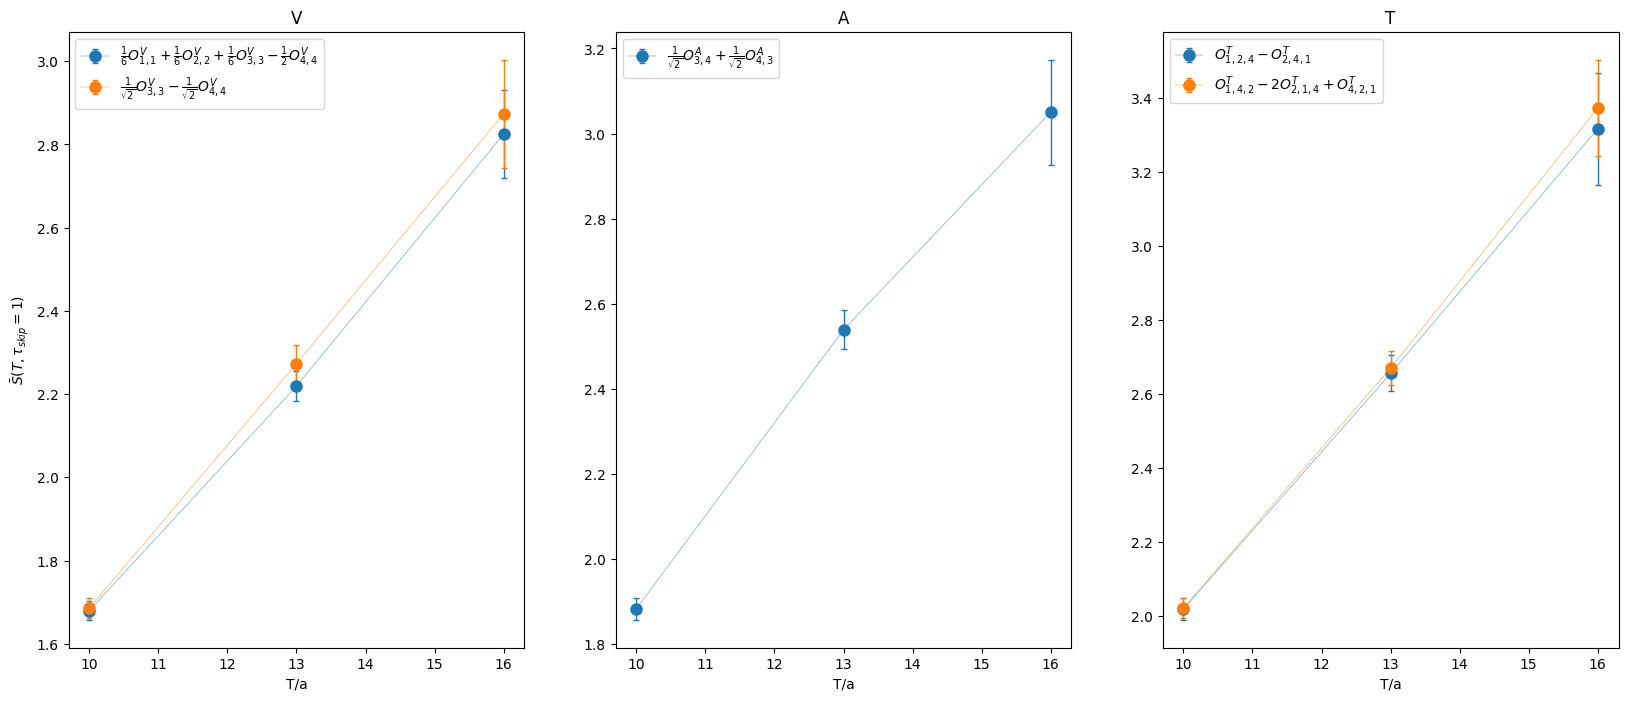

In [38]:
_ = opAnalyzer.plot_S(tskip=1)

In [39]:
opAnalyzer.chosen_T_list

[10, 13, 16]

In [40]:
for iop in range(opAnalyzer.Nop):
    opAnalyzer.get_M_from_S(method="finite differences", scheme='central')[iop]
    opAnalyzer.get_M_from_S(method="fit", scheme='central')[iop]

array([0 ± 0, 0.193(15), 0 ± 0], dtype=object)

array([0 ± 0, 0 ± 0, 0 ± 0], dtype=object)

array([0 ± 0, 0.201(19), 0 ± 0], dtype=object)

array([0 ± 0, 0 ± 0, 0 ± 0], dtype=object)

array([0 ± 0, 0.201(18), 0 ± 0], dtype=object)

array([0 ± 0, 0 ± 0, 0 ± 0], dtype=object)

array([0 ± 0, 0.220(23), 0 ± 0], dtype=object)

array([0 ± 0, 0 ± 0, 0 ± 0], dtype=object)

array([0 ± 0, 0.228(20), 0 ± 0], dtype=object)

array([0 ± 0, 0 ± 0, 0 ± 0], dtype=object)